# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [56]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-02-2021.csv")

#### Display the top 5 rows in the data

In [59]:
data.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-03-03 05:23:28,33.93911,67.709953,55759,2446,49347,3966,Afghanistan,143.234976,4.386736
1,NaN,NaN,NaN,Albania,2021-03-03 05:23:28,41.15330,20.168300,108823,1835,71173,35815,Albania,3781.465008,1.686224
2,NaN,NaN,NaN,Algeria,2021-03-03 05:23:28,28.03390,1.659600,113430,2991,78377,32062,Algeria,258.671156,2.636869
3,NaN,NaN,NaN,Andorra,2021-03-03 05:23:28,42.50630,1.521800,10908,110,10501,297,Andorra,14117.647059,1.008434
4,NaN,NaN,NaN,Angola,2021-03-03 05:23:28,-11.20270,17.873900,20882,510,19410,962,Angola,63.536268,2.442295


#### Show the information of the dataset

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            4014 non-null   int64  
 10  Active               4014 non-null   int64  
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3967 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 439.2+ KB


#### Show the sum of missing values of features in the dataset

In [61]:
data.isna().sum()

FIPS                   748
Admin2                 743
Province_State         179
Country_Region           0
Last_Update              0
Lat                     90
Long_                   90
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           90
Case_Fatality_Ratio     47
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [62]:
data.groupby("Country_Region")["Confirmed"].sum()

Country_Region
Afghanistan              55759
Albania                 108823
Algeria                 113430
Andorra                  10908
Angola                   20882
                         ...  
West Bank and Gaza      187309
Winter Olympics 2022         0
Yemen                     2342
Zambia                   79557
Zimbabwe                 36148
Name: Confirmed, Length: 201, dtype: int64

#### Show the number of Deaths by Country

In [63]:
data.groupby("Country_Region")["Deaths"].sum()

Country_Region
Afghanistan             2446
Albania                 1835
Algeria                 2991
Andorra                  110
Angola                   510
                        ... 
West Bank and Gaza      2063
Winter Olympics 2022       0
Yemen                    640
Zambia                  1104
Zimbabwe                1472
Name: Deaths, Length: 201, dtype: int64

#### Show the number of Recovered cases by Country

In [64]:
data.groupby("Country_Region")["Recovered"].sum()

Country_Region
Afghanistan              49347
Albania                  71173
Algeria                  78377
Andorra                  10501
Angola                   19410
                         ...  
West Bank and Gaza      168763
Winter Olympics 2022         0
Yemen                     1435
Zambia                   75563
Zimbabwe                 32989
Name: Recovered, Length: 201, dtype: int64

#### Show the number of Active Cases by Country

In [65]:
data.groupby("Country_Region")["Active"].sum()

Country_Region
Afghanistan              3966
Albania                 35815
Algeria                 32062
Andorra                   297
Angola                    962
                        ...  
West Bank and Gaza      16483
Winter Olympics 2022        0
Yemen                     267
Zambia                   2890
Zimbabwe                 1687
Name: Active, Length: 201, dtype: int64

#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [66]:
data.groupby("Country_Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,55759,2446,49347,3966
Albania,108823,1835,71173,35815
Algeria,113430,2991,78377,32062
Andorra,10908,110,10501,297
Angola,20882,510,19410,962
...,...,...,...,...
West Bank and Gaza,187309,2063,168763,16483
Winter Olympics 2022,0,0,0,0
Yemen,2342,640,1435,267


### Question 3

### Show the countries with no recovered cases

In [67]:
df = data.groupby("Country_Region")["Recovered"].sum()
df[df == 0]

Country_Region
Antarctica              0
Belgium                 0
Kiribati                0
Korea, North            0
Nauru                   0
Palau                   0
Serbia                  0
Summer Olympics 2020    0
Sweden                  0
Tonga                   0
Tuvalu                  0
US                      0
Winter Olympics 2022    0
Name: Recovered, dtype: int64

#### Show the countries with no confirmed cases

In [68]:
df = data.groupby("Country_Region")["Confirmed"].sum()
df[df == 0]

Country_Region
Antarctica              0
Kiribati                0
Korea, North            0
Nauru                   0
Palau                   0
Summer Olympics 2020    0
Tonga                   0
Tuvalu                  0
Winter Olympics 2022    0
Name: Confirmed, dtype: int64

#### Show the countries with no deaths

In [69]:
df = data.groupby("Country_Region")["Deaths"].sum()
df[df == 0]

Country_Region
Antarctica               0
Cambodia                 0
Dominica                 0
Holy See                 0
Kiribati                 0
Korea, North             0
Laos                     0
Marshall Islands         0
Micronesia               0
Nauru                    0
Palau                    0
Saint Kitts and Nevis    0
Samoa                    0
Solomon Islands          0
Summer Olympics 2020     0
Timor-Leste              0
Tonga                    0
Tuvalu                   0
Vanuatu                  0
Winter Olympics 2022     0
Name: Deaths, dtype: int64

#### Show Confirmed, Deaths and Recovered cases for Countries with 0 Deaths

In [70]:
df = data.groupby("Country_Region")["Confirmed", "Deaths", "Recovered"].sum()
df[df["Deaths"] == 0]

C:\Users\mayur\AppData\Local\Temp\ipykernel_5300\4173254112.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby("Country_Region")["Confirmed", "Deaths", "Recovered"].sum()


,Confirmed,Deaths,Recovered
Country_Region,,,
Antarctica,0,0,0
Cambodia,878,0,482
Dominica,144,0,130
Holy See,27,0,15
Kiribati,0,0,0
"Korea, North",0,0,0
Laos,45,0,42
Marshall Islands,4,0,4
Micronesia,1,0,1


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [72]:
res = data.groupby(["Country_Region", "Last_Update"])["Confirmed", "Deaths", "Recovered"].sum()
res.sort_values(by="Confirmed", inplace=True, ascending=False)
res.head(10)

C:\Users\mayur\AppData\Local\Temp\ipykernel_5300\218912200.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res = data.groupby(["Country_Region", "Last_Update"])["Confirmed", "Deaths", "Recovered"].sum()


,,Confirmed,Deaths,Recovered
Country_Region,Last_Update,,,
US,2021-03-03 05:23:28,28868888,514939,0
India,2021-03-03 05:23:28,11139516,157346,10812044
Brazil,2021-03-03 05:23:28,10658171,257728,9506251
Russia,2021-03-03 05:23:28,4220291,85458,3794930
United Kingdom,2021-03-03 05:23:28,4200697,149179,11662
France,2021-03-03 05:23:28,3843290,87372,266674
Spain,2021-03-03 05:23:28,3130184,69801,150376
Italy,2021-03-03 05:23:28,2955434,98288,2426150
Turkey,2021-03-03 05:23:28,2723316,28706,2586073


#### Show the Top 10 Countries with Active cases

In [74]:
res = data.groupby(["Country_Region", "Last_Update"])["Active", "Confirmed", "Deaths", "Recovered"].sum()
res.sort_values(by="Active", inplace=True, ascending=False)
res.head(10)

C:\Users\mayur\AppData\Local\Temp\ipykernel_5300\3542233648.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res = data.groupby(["Country_Region", "Last_Update"])["Active", "Confirmed", "Deaths", "Recovered"].sum()


,,Active,Confirmed,Deaths,Recovered
Country_Region,Last_Update,,,,
US,2021-03-03 05:23:28,28314195,28868888,514939,0
United Kingdom,2021-03-03 05:23:28,4065508,4200697,149179,11662
France,2021-03-03 05:23:28,3489244,3843290,87372,266674
Spain,2021-03-03 05:23:28,2910007,3130184,69801,150376
Mexico,2021-03-03 05:23:28,1910007,2097194,187187,1645312
Peru,2021-03-03 05:23:28,1214597,1338297,123700,1236668
Netherlands,2021-03-03 05:23:28,1081043,1111168,15772,14353
Brazil,2021-03-03 05:23:28,883582,10658171,257728,9506251
Belgium,2021-03-03 05:23:28,760059,774344,22141,0


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active cases where total deaths have exceeded 50,000

In [75]:
import matplotlib.pyplot as plt

In [76]:
df = data.groupby("Country_Region")["Country_Region", "Deaths", "Confirmed", "Recovered", "Active"].sum()
df = df[df["Deaths"] > 50000]

C:\Users\mayur\AppData\Local\Temp\ipykernel_5300\4280305549.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby("Country_Region")["Country_Region", "Deaths", "Confirmed", "Recovered", "Active"].sum()
C:\Users\mayur\AppData\Local\Temp\ipykernel_5300\4280305549.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby("Country_Region")["Country_Region", "Deaths", "Confirmed", "Recovered", "Active"].sum()


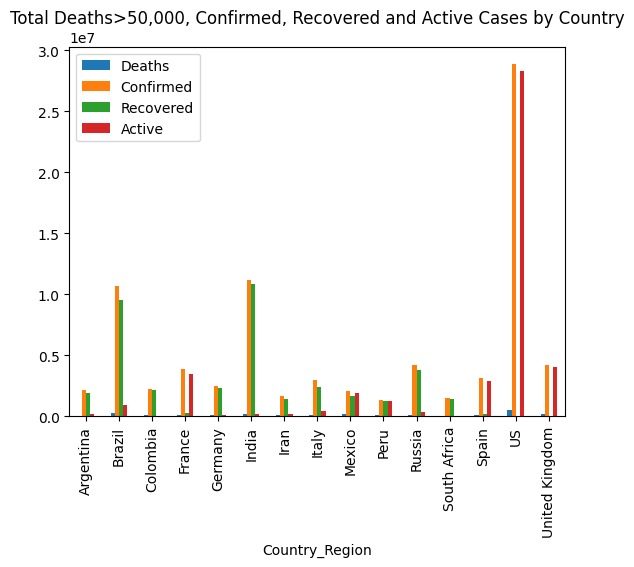

In [77]:
df.plot(kind="bar")
plt.title("Total Deaths>50,000, Confirmed, Recovered and Active Cases by Country")
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [79]:
import plotly.express as px

In [80]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [81]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

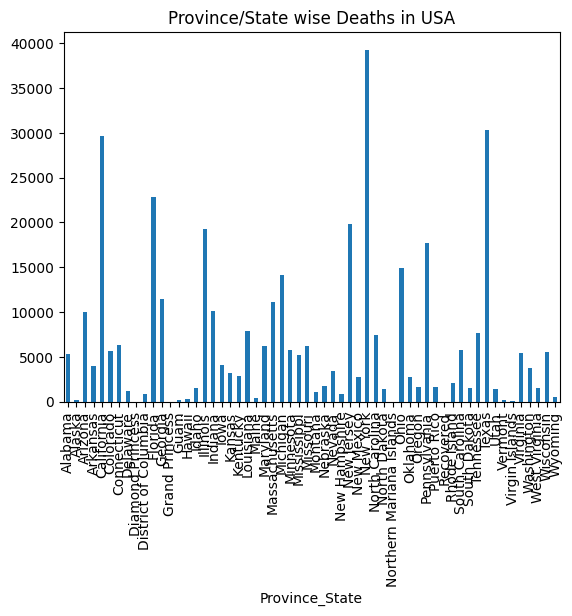

In [82]:
df = covid_data[covid_data["Country_Region"] == "US"].groupby("Province_State")["Deaths"].sum()
df.plot(kind="bar")
plt.title("Province/State wise Deaths in USA")
plt.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

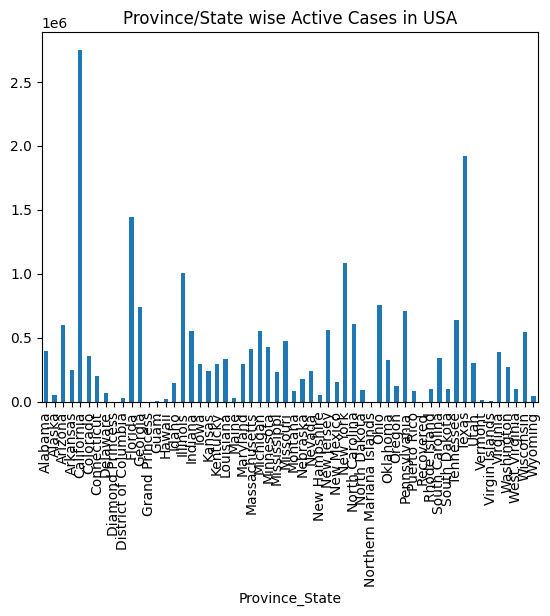

In [84]:
df = covid_data[covid_data["Country_Region"] == "US"].groupby("Province_State")["Active"].sum()
df.plot(kind="bar")
plt.title("Province/State wise Active Cases in USA")
plt.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

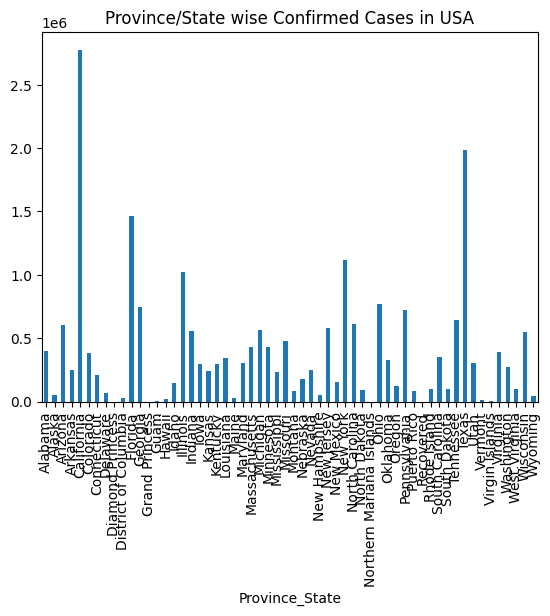

In [85]:
df = covid_data[covid_data["Country_Region"] == "US"].groupby("Province_State")["Confirmed"].sum()
df.plot(kind="bar")
plt.title("Province/State wise Confirmed Cases in USA")
plt.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [86]:
import plotly.express as px
import plotly.io as pio

In [120]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-02-2021.csv"
months = {'FEB 2021':'02',
          'MAR 2021':'03',
          'APR 2021':'04',
          'MAY 2021':'05',
          'JUN 2021':'06'}

date = []
confirmed = []
for month in months:
    df = pd.read_csv(url[:-11]+months[month]+url[-9:])
    date.append(month)
    confirmed.append(df["Confirmed"].sum())

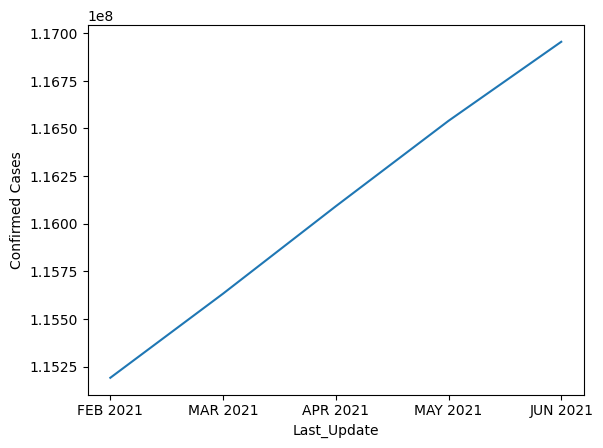

In [132]:
plt.plot(date, confirmed)
plt.xlabel("Last_Update")
plt.ylabel("Confirmed Cases")
plt.show()